#### HW1 - Distributions and EDA

In [1]:
### load module

import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr, spearmanr

### 1. Timeseries plot

Create a timeseries plot for two evapotranspiration dataset indicating an area of forest and savana in Brazilia. 

In [2]:
### open datasate

ds_for = np.load("ETfor.npy")
ds_sav = np.load ("ETsav.npy")
ds_ts = np.load("Time_LH.npy")

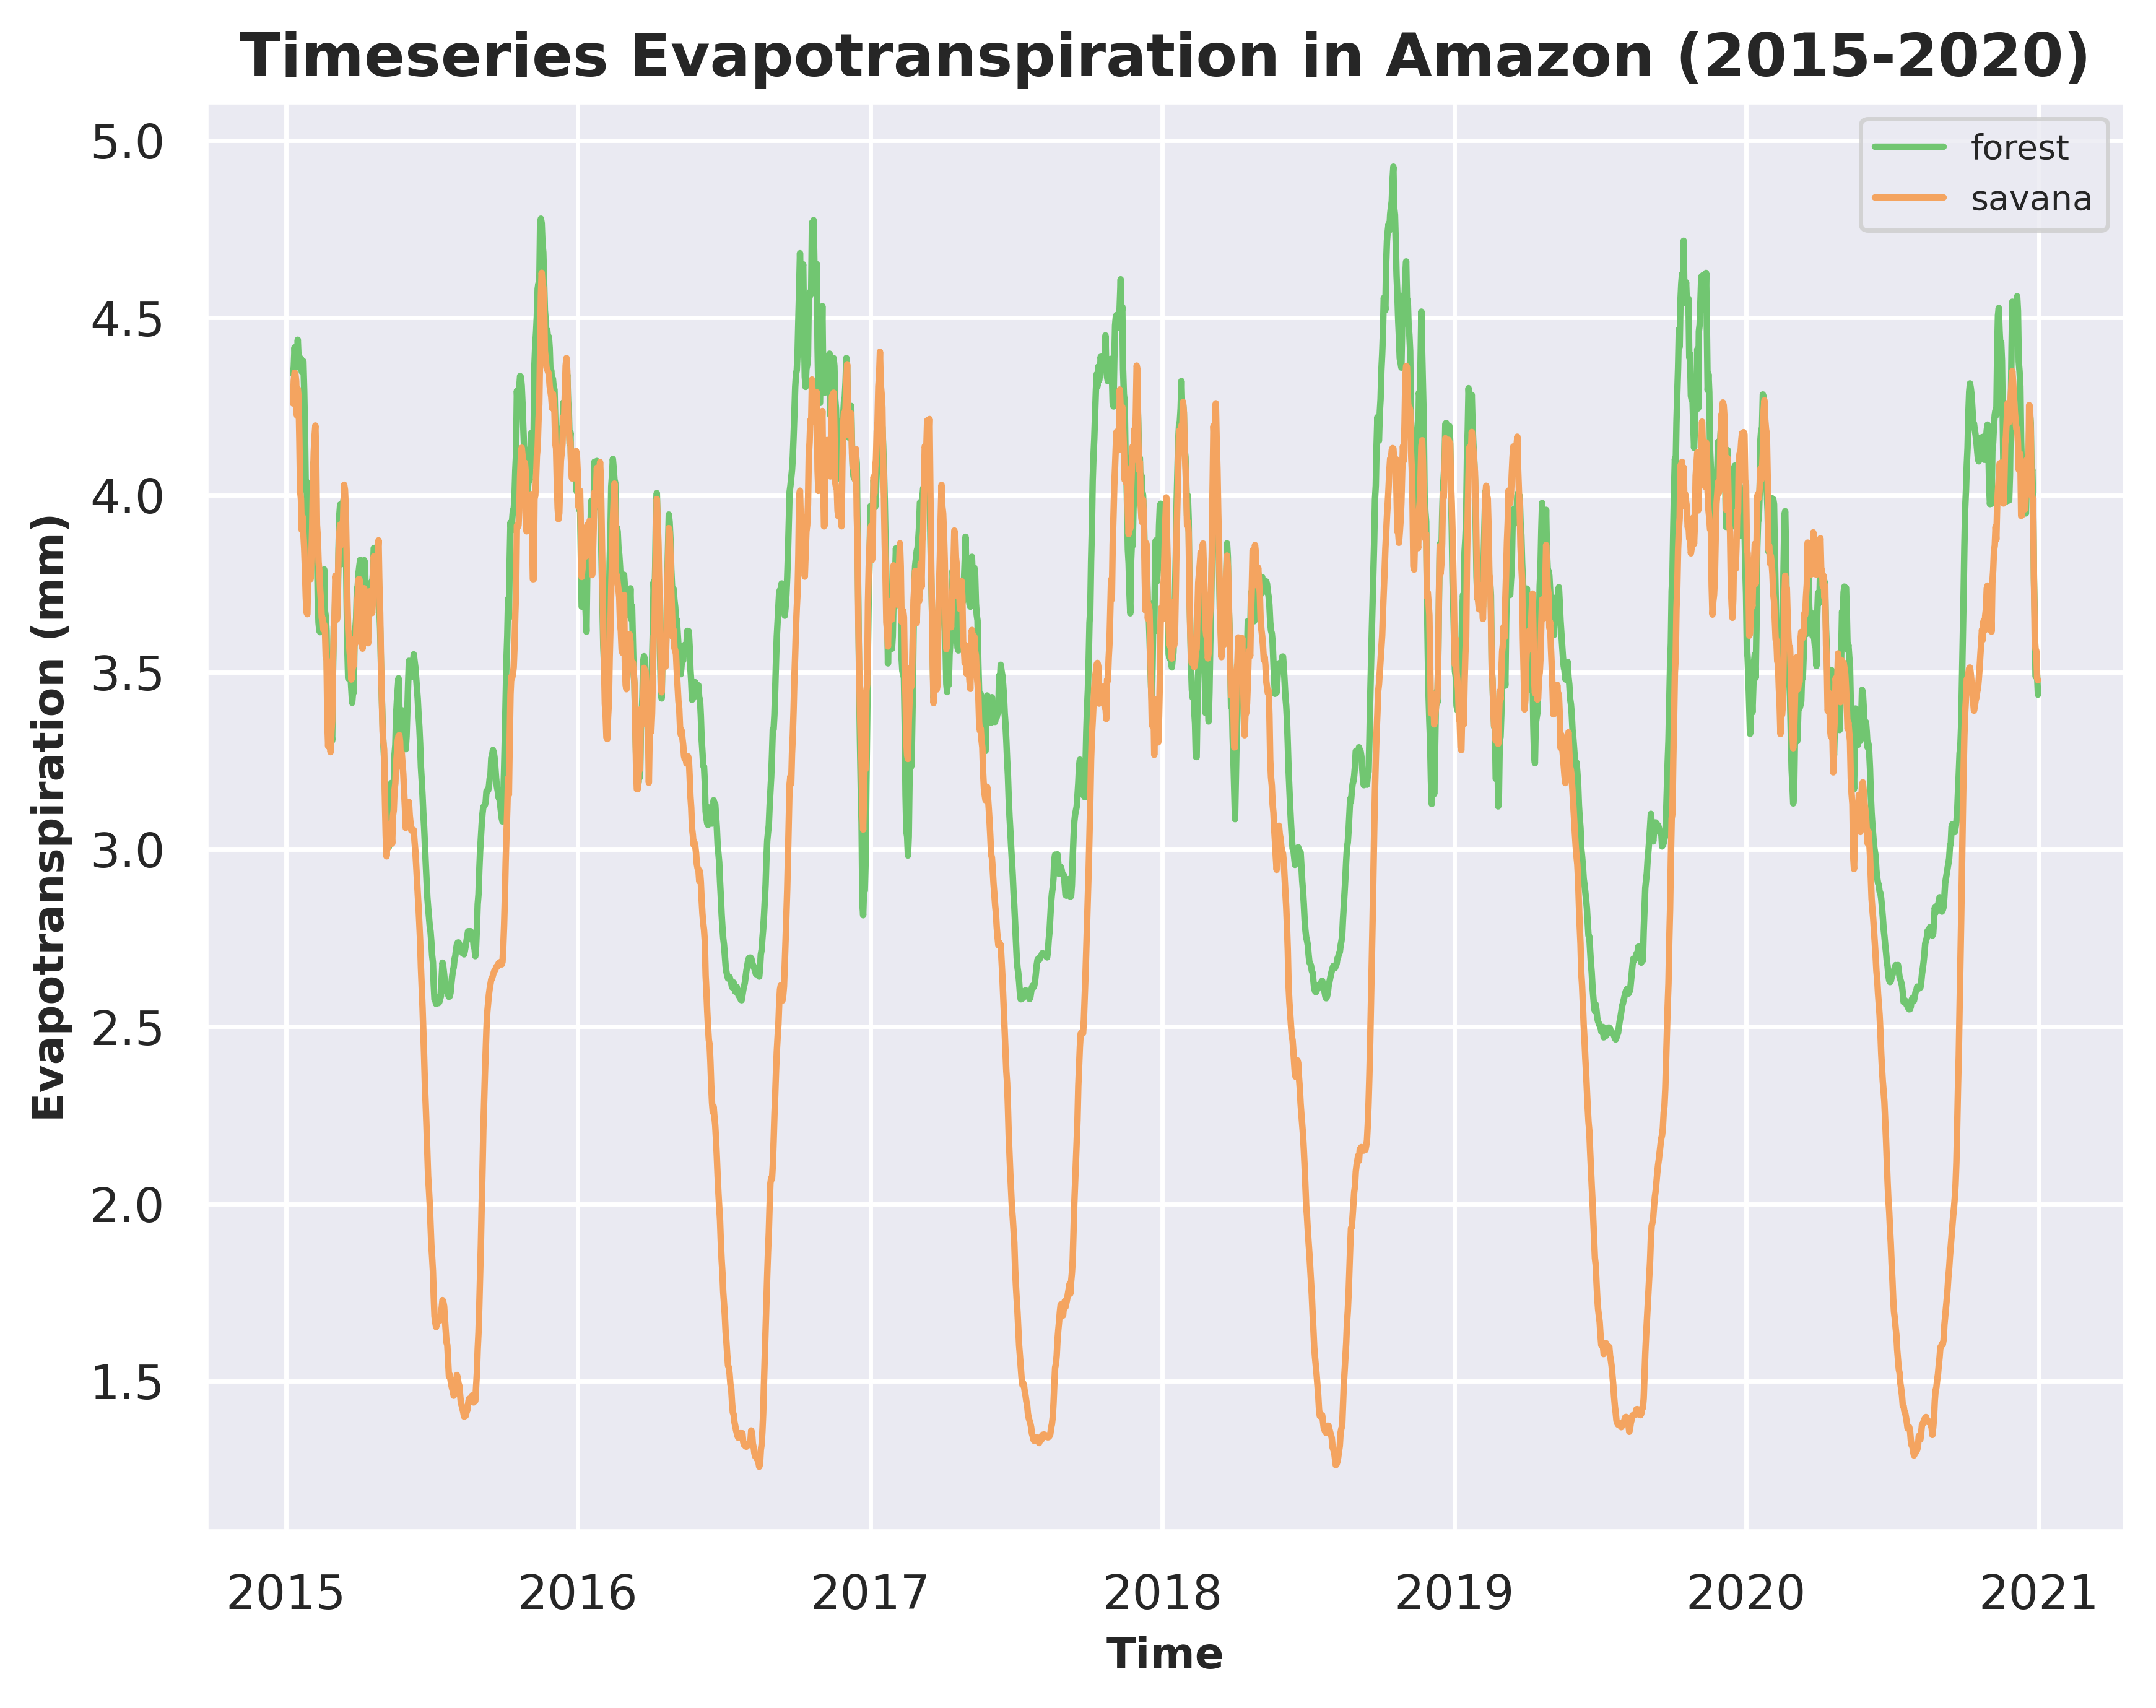

In [3]:
### plot timeseries
# set ip the size
plt.figure(figsize=(8, 6), dpi=500)

# create a plot
sns.set()
sns.lineplot(x = ds_ts, y = ds_for, label='forest', color='#71C671')
sns.lineplot(x = ds_ts, y = ds_sav, label='savana', color='#F4A460')

# add title, label and figure
plt.title("Timeseries Evapotranspiration in Amazon (2015-2020)", fontweight='bold', fontsize = 14)
plt.xlabel("Time", fontweight='bold', fontsize = 10)
plt.ylabel("Evapotranspiration (mm)", fontweight='bold', fontsize = 10)
plt.legend(fontsize=8, loc='upper right')

# show the plot
plt.show()

### 2. Boxplot 

Calculate the attributes (quartile, median, and inter-quartile) and create a boxplot.

In [4]:
### calculate the attributes
# for forest
qt_for = np.percentile(ds_for, [25, 50, 75])
iqt_for = iqr(ds_for)

# for savana
qt_sav = np.percentile(ds_sav, [25, 50, 75])
iqt_sav = iqr(ds_sav)

# print the attributes for both landuse
print("Data Attribute for ET (mm) in the selected landuse")
print()
print("Forest")
print("Lower quartile:", round(qt_for[0], 2))
print("Median:", round(qt_for[1], 2))
print("Upper quartile:", round(qt_for[2], 2))
print("Interquartile:", round(iqt_for, 2))
print()
print("Savana")
print("Lower quartile:", round(qt_sav[0], 2))
print("Median:", round(qt_sav[1], 2))
print("Upper quartile:", round(qt_sav[2], 2))
print("Interquartile:", round(iqt_sav, 2))

Data Attribute for ET (mm) in the selected landuse

Forest
Lower quartile: 3.11
Median: 3.58
Upper quartile: 3.99
Interquartile: 0.88

Savana
Lower quartile: 2.42
Median: 3.49
Upper quartile: 3.86
Interquartile: 1.44


In [5]:
# combined the data to ease the plot
combined_dfs = pd.DataFrame({'Forest' : ds_for,
                'Savanna' : ds_sav})
df_et = pd.melt(combined_dfs)


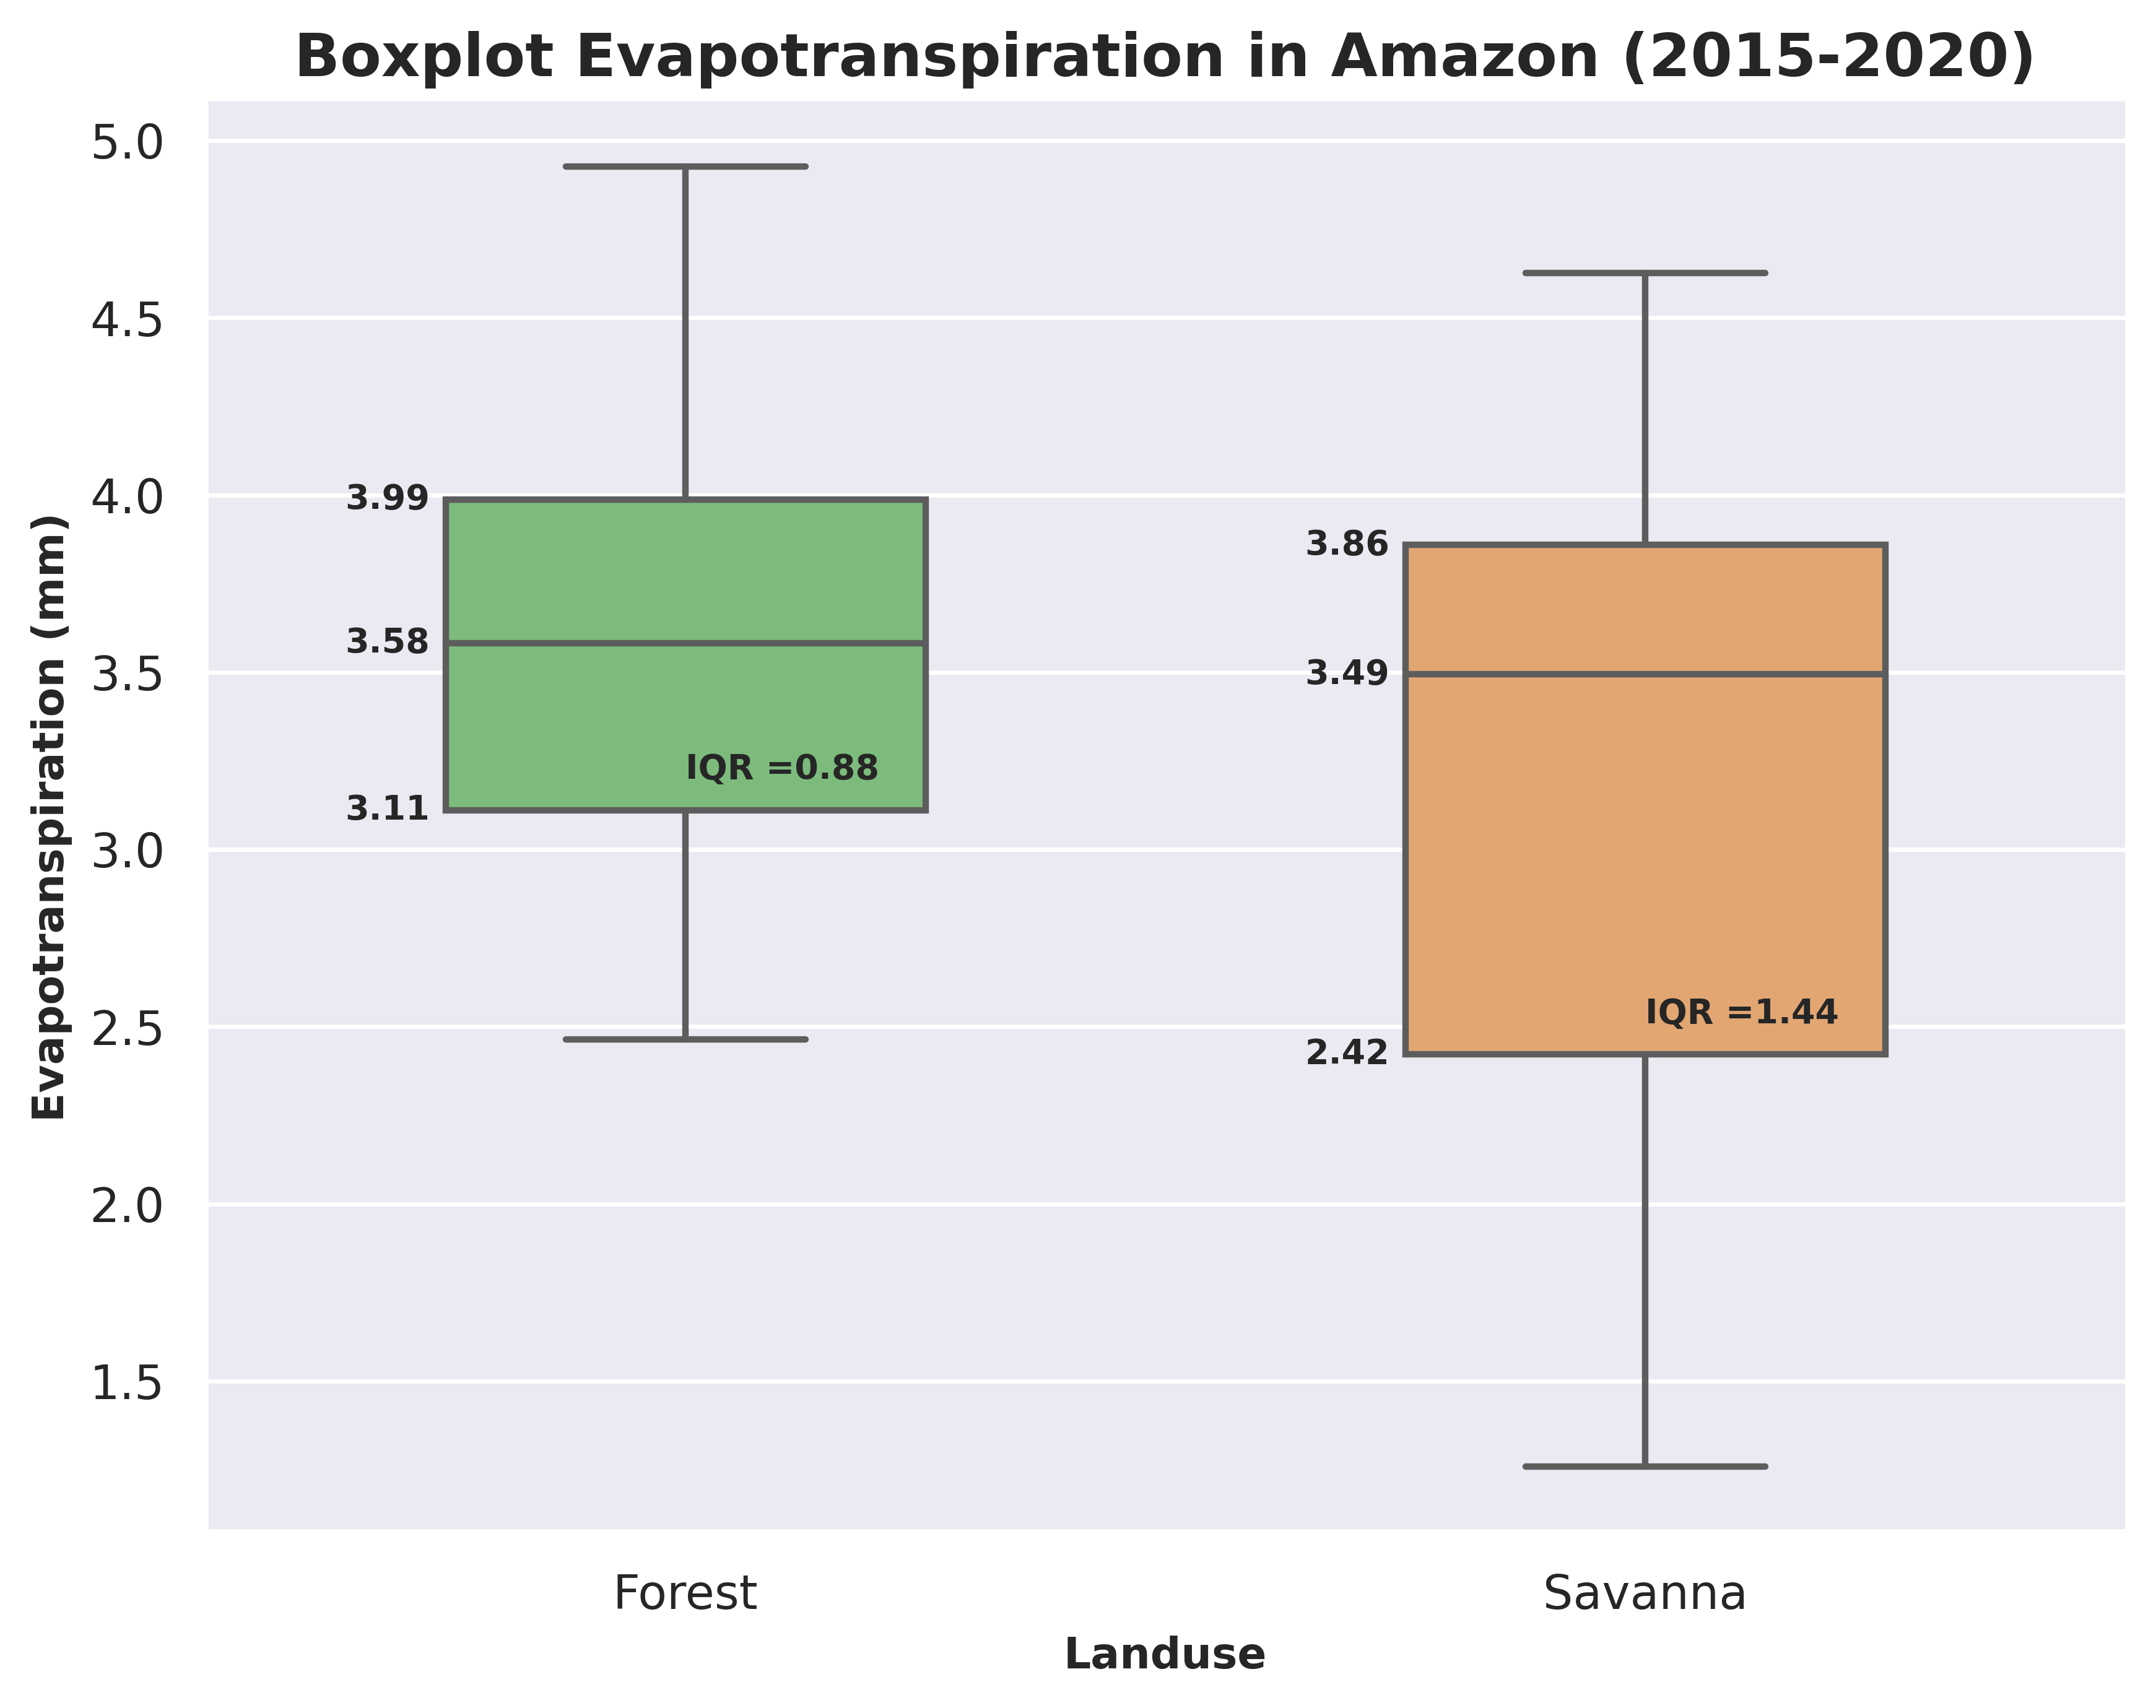

In [6]:
### boxplot 
# set up the size
plt.figure(figsize=(8, 6), dpi=500)
 
# set color
my_pal = {"Savanna": "#F4A460", "Forest": "#71C671"}

# create a plot
sns.set()
box_width = 0.5

ax = sns.boxplot(data=df_et, x='variable', y='value', 
                    width=box_width, palette=my_pal)
sns.despine()

# calculate and annatote teh attribute of boxplot
i = 0
for name, group in df_et.groupby('variable'):
    Q1, Q2, Q3, = group['value'].quantile([0.25, 0.5, 0.75])
    for q in (Q1, Q2, Q3):
        x = i-box_width/3
        y = q
        ax.annotate('%.2f' % q, (x,y), fontsize=8, fontweight='bold',
                    xytext=(x-0.1, y), textcoords='data',
                    #arrowprops=dict(facecolor='black', shrink=0.01),
                    va='center', ha='right')
    
    i+=1   

plt.text(0.00000000000000005, 3.2, 'IQR =' + str(round(iqt_for, 2)),fontsize=8, fontweight='bold')
plt.text(1.0, 2.51, 'IQR =' + str(round(iqt_sav, 2)),fontsize=8, fontweight='bold')
 
#plt.text(0.1, 0.5,
#         'IQR =' + str(1.44),
#         bbox=dict(facecolor='pink',
#                   alpha=0.5),
#         horizontalalignment='right',
#        fontsize=12)

# add title, label and figure
plt.title("Boxplot Evapotranspiration in Amazon (2015-2020)", fontweight='bold', fontsize = 14)
plt.xlabel("Landuse", fontweight='bold', fontsize = 10)
plt.ylabel("Evapotranspiration (mm)", fontweight='bold', fontsize = 10)

# show the plot
plt.show()

### 3. Histogram
Create a histogram for both dataset and justify the used bin size

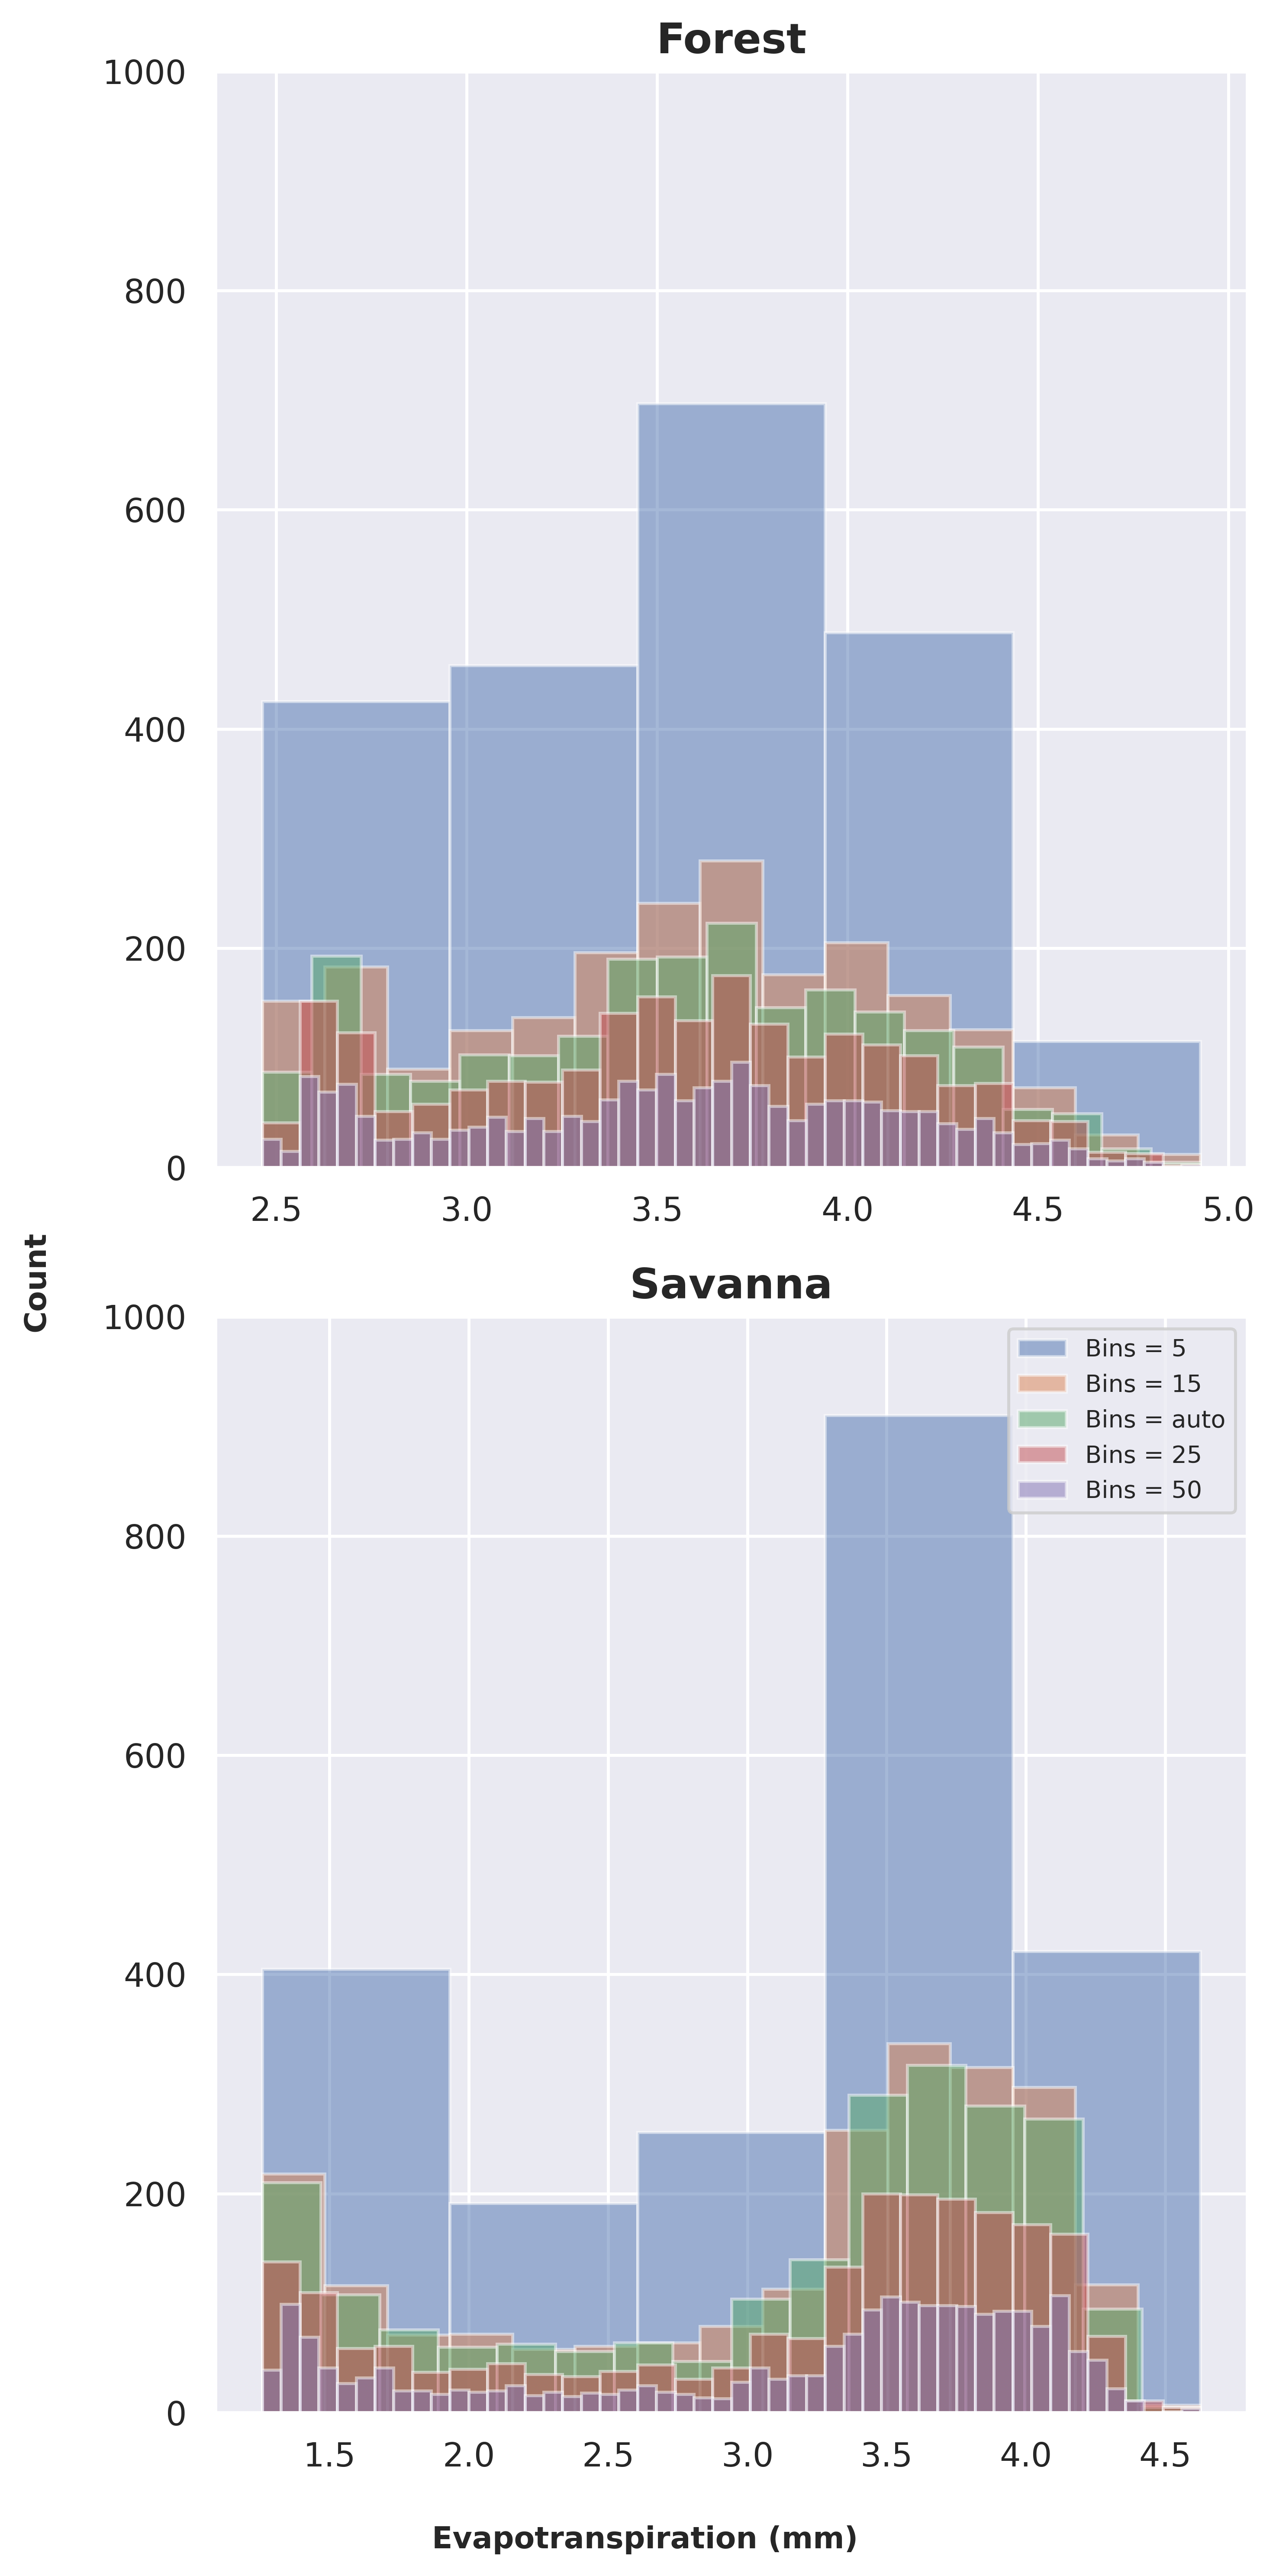

In [7]:
### Histogram and bin selection for Forest

# number of selection bins
bins_values = [5, 15, 'auto', 25, 50]

# set up the size 
fig, axs = plt.subplots(2, 1, figsize=(6, 12), dpi=500)
(ax1, ax2) = axs

# create a histogram
sns.set()
for i in bins_values:
    sns.set()
    ax1.hist(ds_for, bins=i, alpha=0.5, label=f"Bins = {i}")
    ax2.hist(ds_sav, bins=i, alpha=0.5, label=f"Bins = {i}")

# add label, title, and legend
ax1.set_ylim(0, 1000)
ax2.set_ylim(0, 1000)
ax1.set_title("Forest", fontweight='bold', fontsize = 14)
ax2.set_title("Savanna", fontweight='bold', fontsize = 14)

fig.supxlabel("Evapotranspiration (mm)", fontweight='bold', fontsize = 10)
fig.supylabel("Count", fontweight='bold', fontsize = 10)
plt.legend(fontsize=8, loc='upper right')

plt.tight_layout()

# show the plot
plt.show()

### 4. KDE Plot for Smoothed Histogram

Create a KDE plot for smoothed vesrion and justify the bandwith

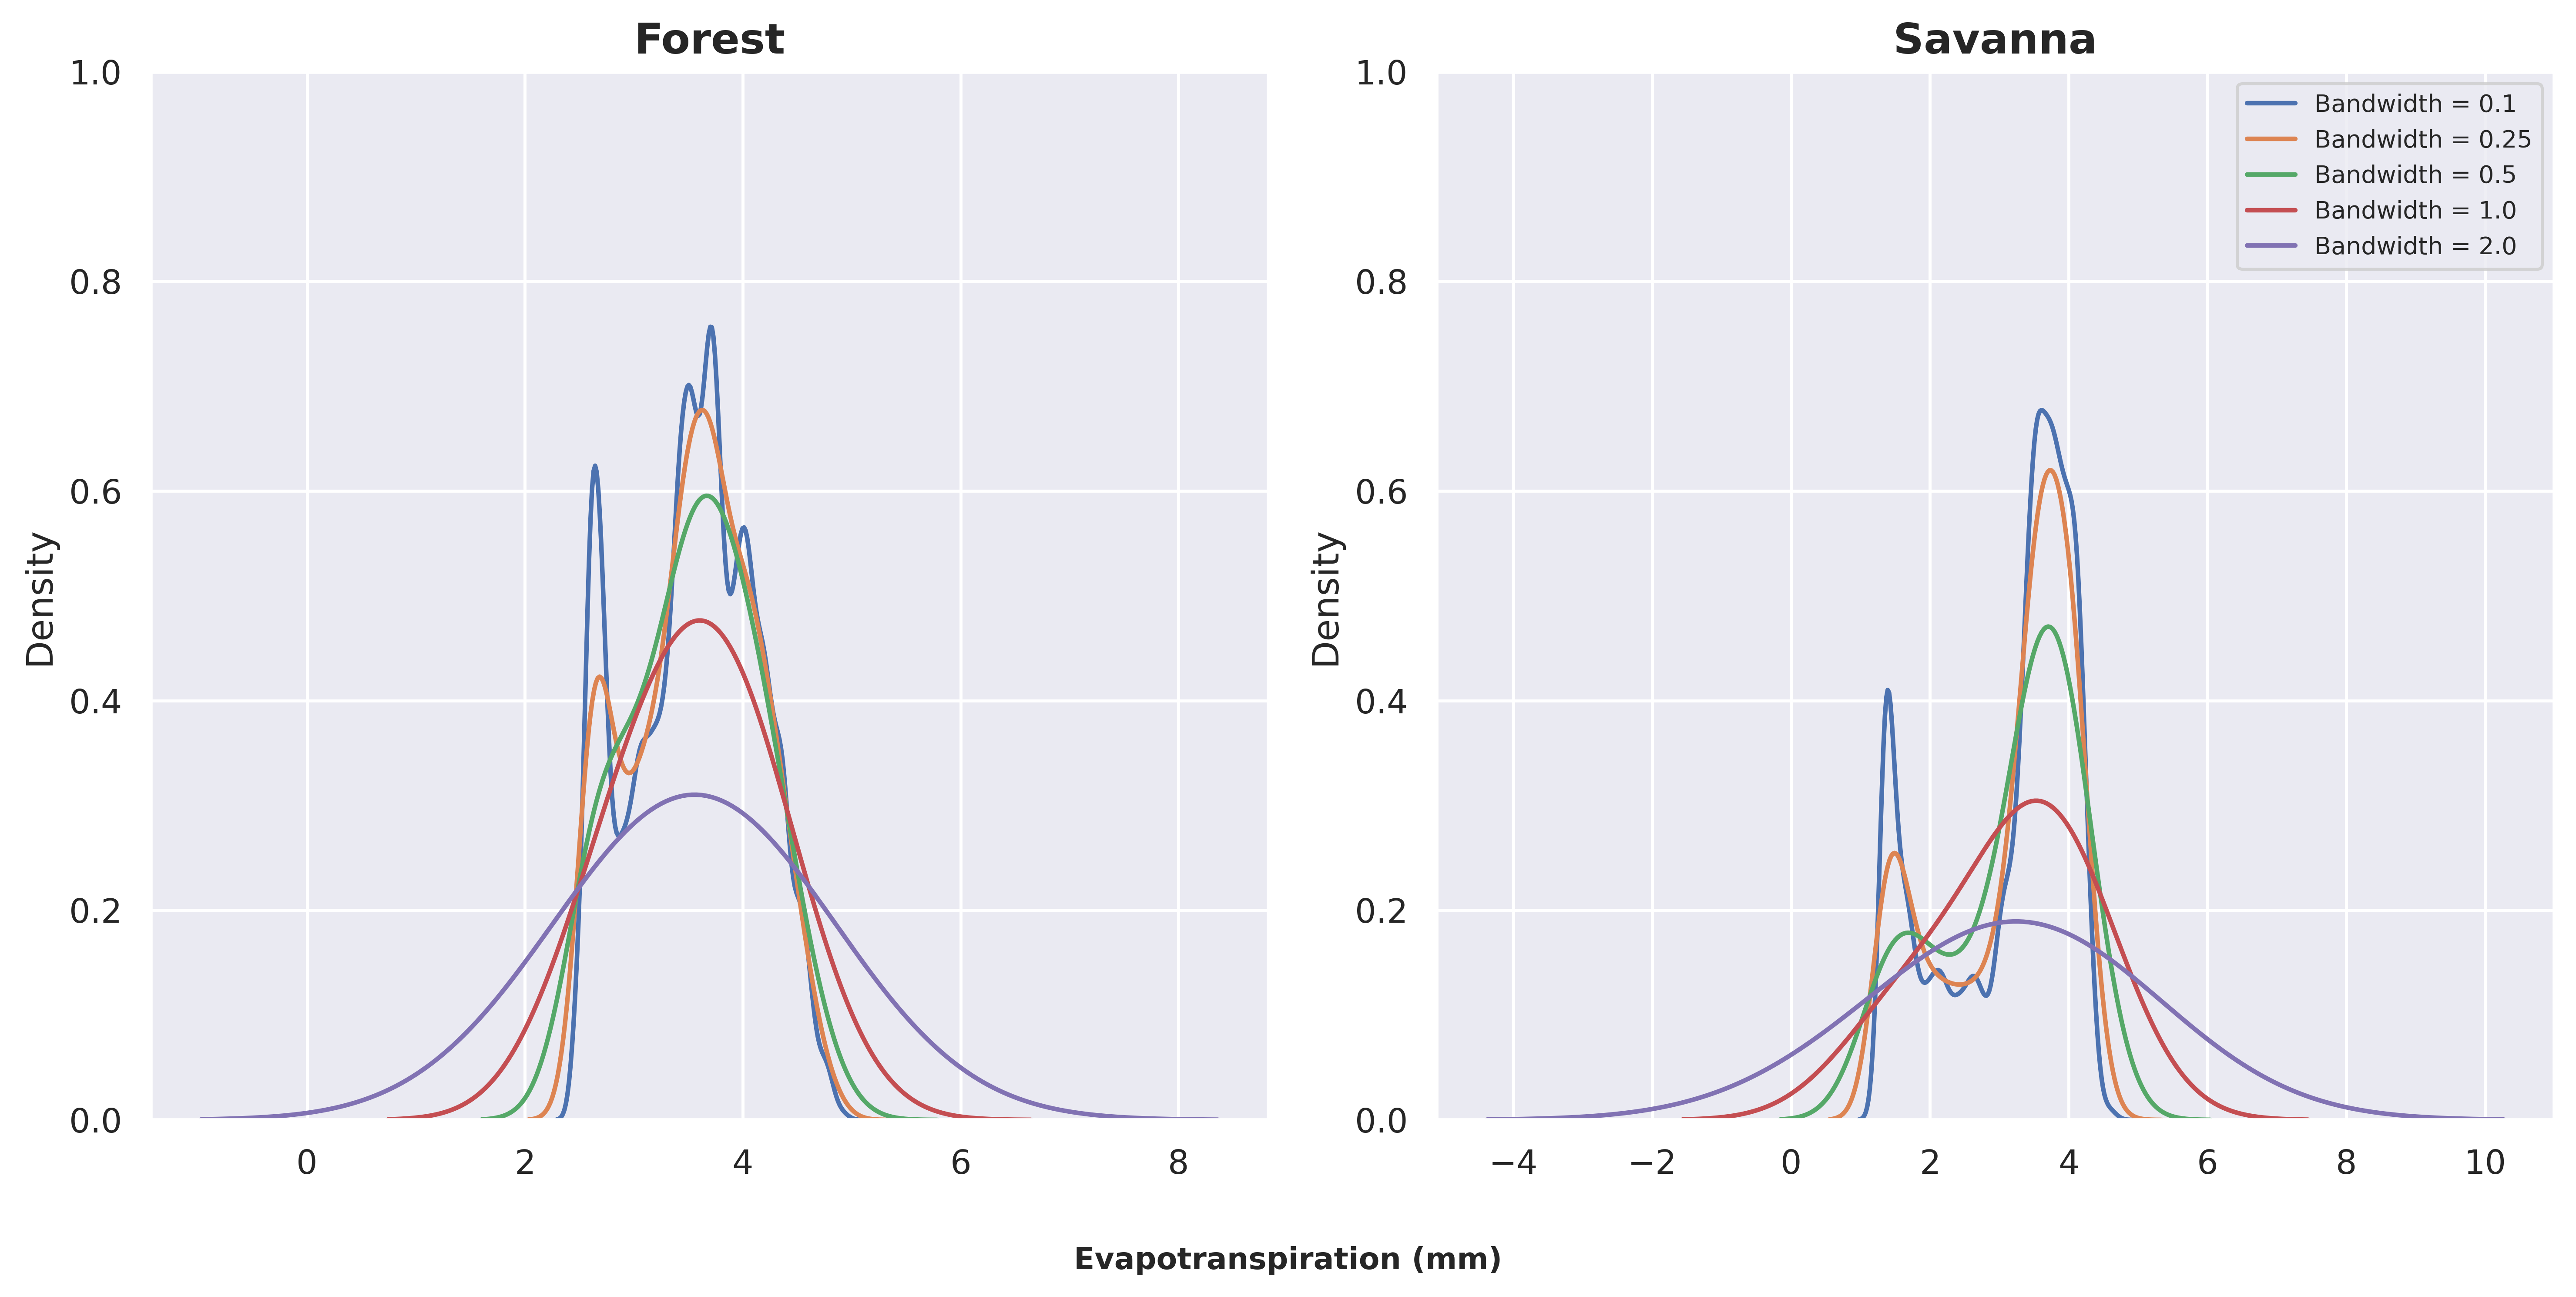

In [8]:
### create a kde plot
# set up the size 
fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=500)
(ax1, ax2) = axs

# bandwith variation
bandwidths = [0.1, 0.25, 0.5, 1.0, 2.0]

# Plot KDE with different bandwidths
#sns.distplot(ds_for, ax=ax1)
#sns.distplot(ds_sav, ax=ax2)

for bw in bandwidths:
    sns.kdeplot(ds_for, bw_method=bw, ax=ax1, label=f"Bandwidth = {bw}")
    sns.kdeplot(ds_sav, bw_method=bw, ax=ax2, label=f"Bandwidth = {bw}")

# add label, title, limit, and legend
ax1.set_ylim(0, 1.0)
ax2.set_ylim(0, 1.0)
ax1.set_title("Forest", fontweight='bold', fontsize = 14)
ax2.set_title("Savanna", fontweight='bold', fontsize = 14)

fig.supxlabel("Evapotranspiration (mm)", fontweight='bold', fontsize = 10)
plt.legend(fontsize=8, loc='upper right')
plt.tight_layout()

# show the plot
plt.show()


### 5. Violin plot
Create a violin plot and see whether there is an additional information

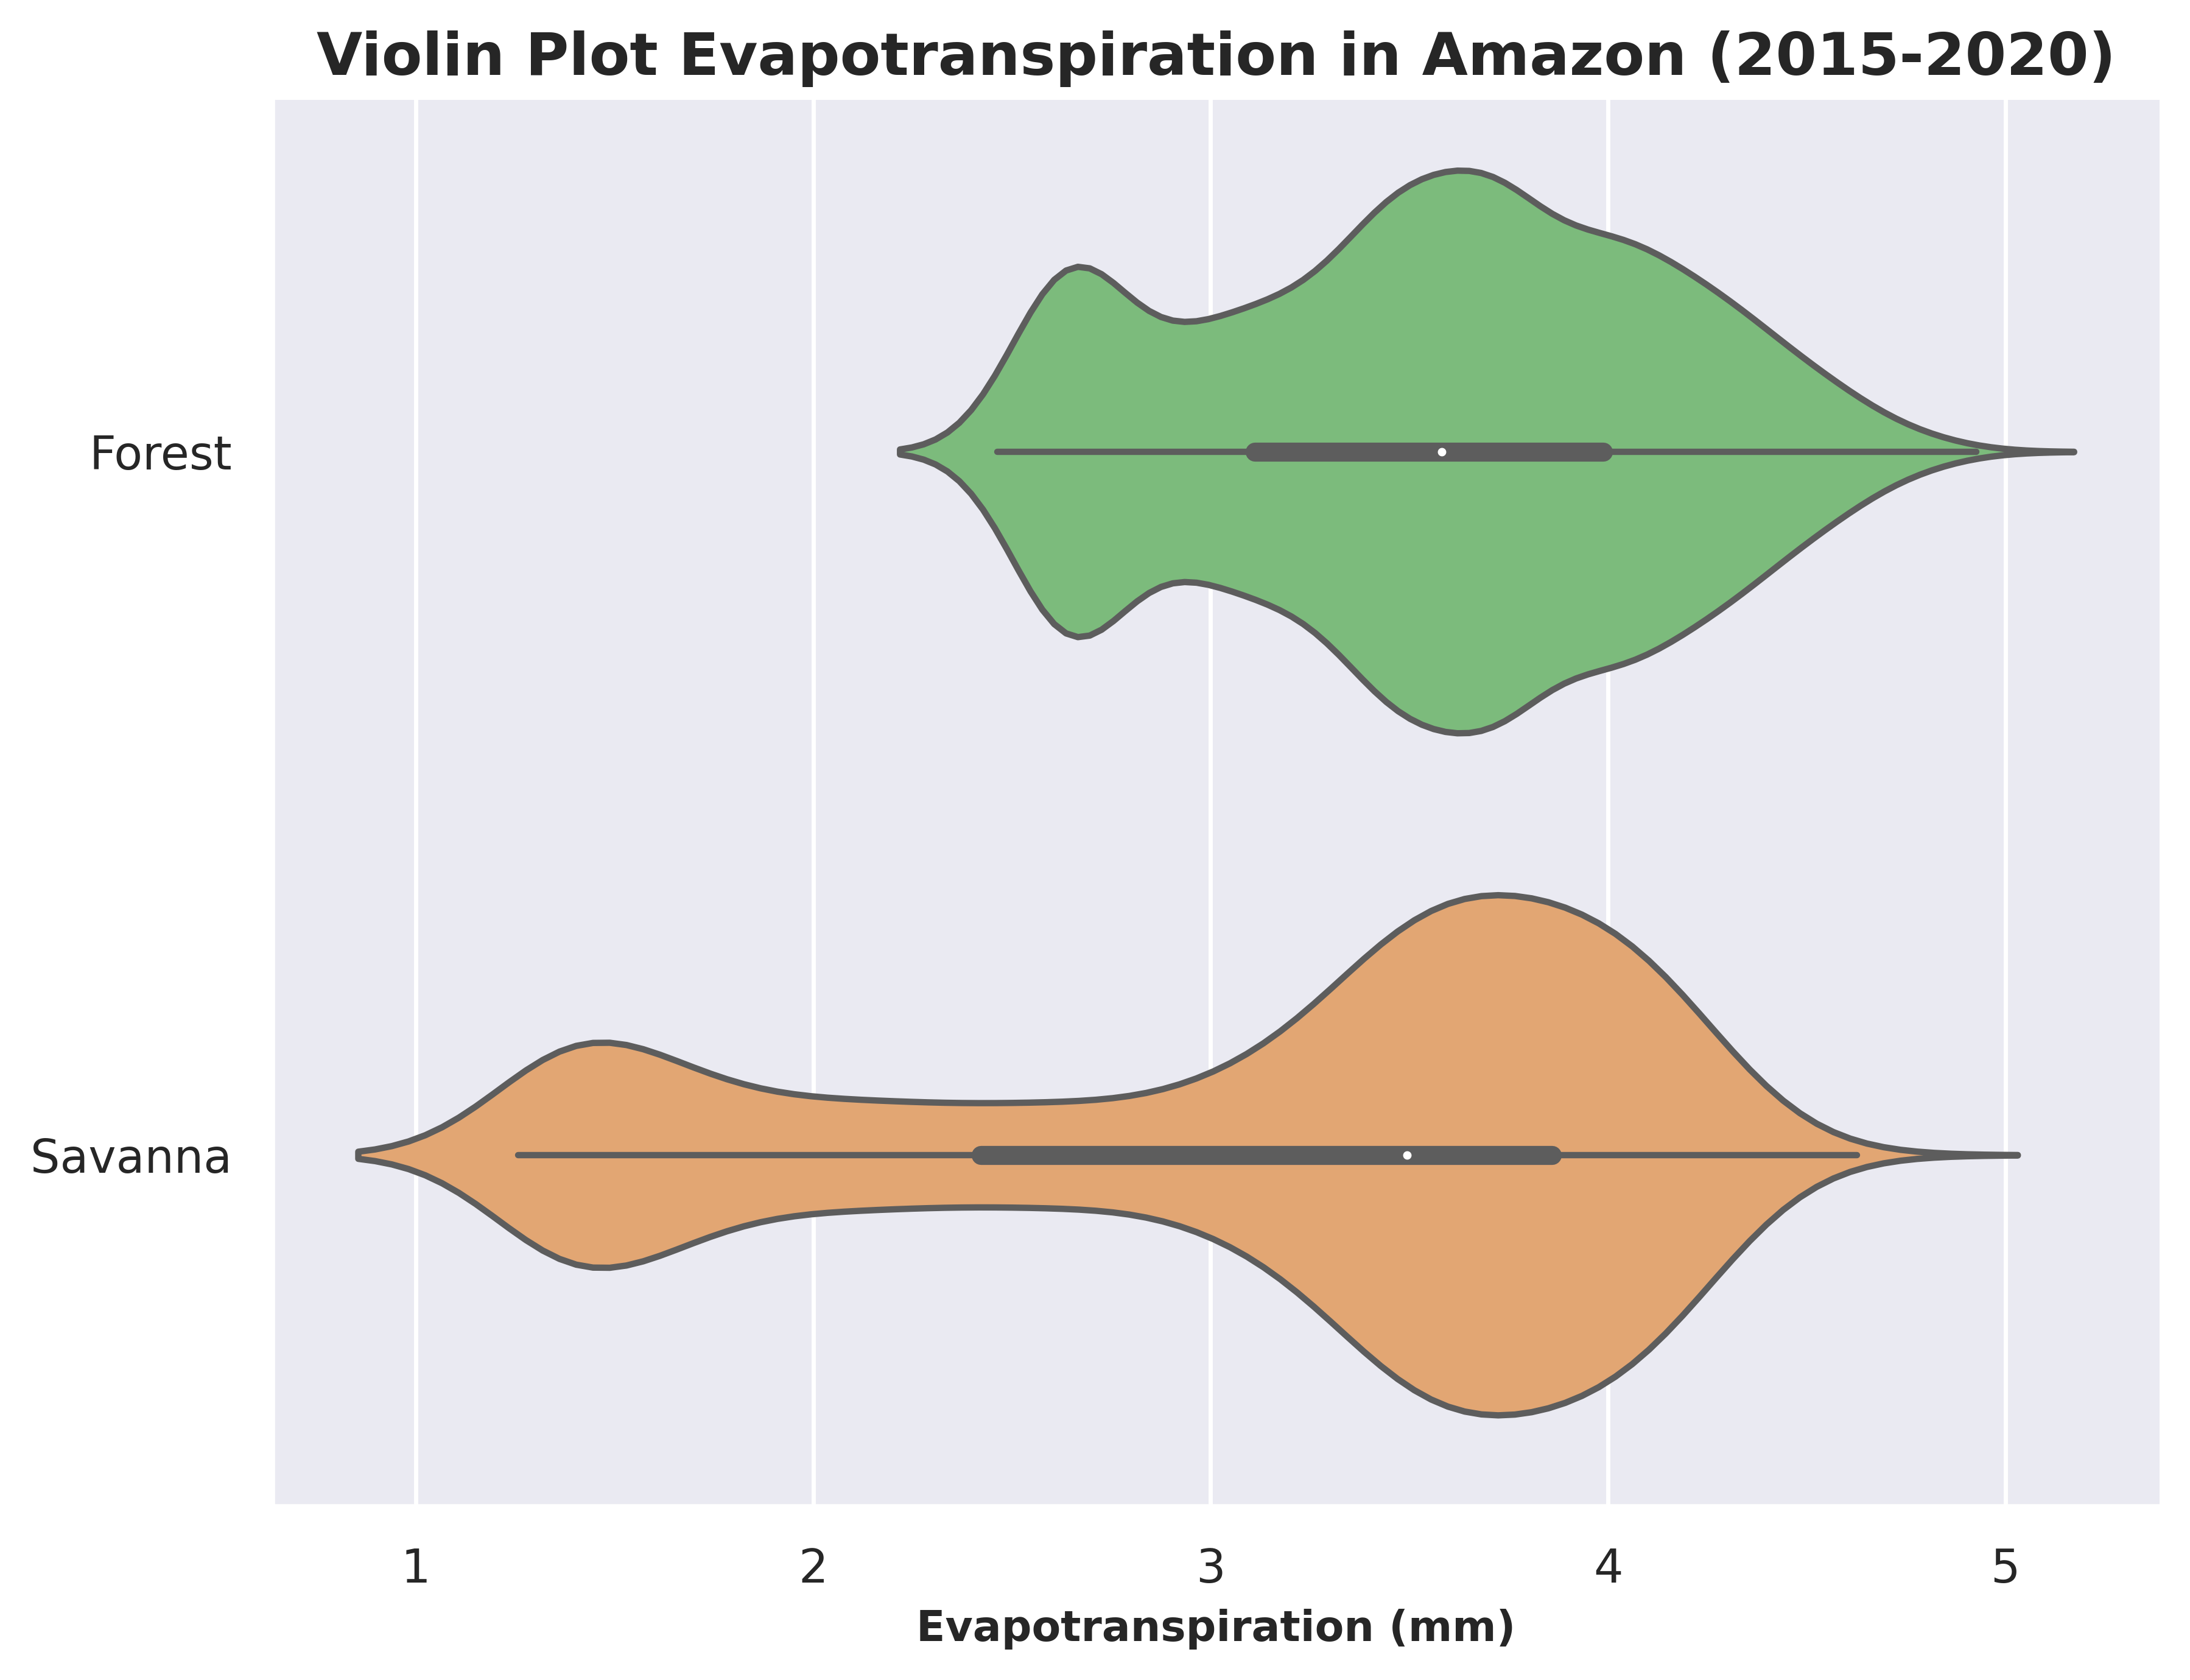

In [9]:
### violin plot
# set up the size
plt.figure(figsize=(8, 6), dpi=500)

# create a plot
sns.set()
sns.violinplot(data=combined_dfs, palette=my_pal, orient ='h')
sns.despine()

# add title, label and figure
plt.title("Violin Plot Evapotranspiration in Amazon (2015-2020)", fontweight='bold', fontsize = 14)
plt.xlabel("Evapotranspiration (mm)", fontweight='bold', fontsize = 10)

# show the plot
plt.show()


### 6. Scatter Plot
Create a scatter plots for two ET dataset and include 2D kernel density

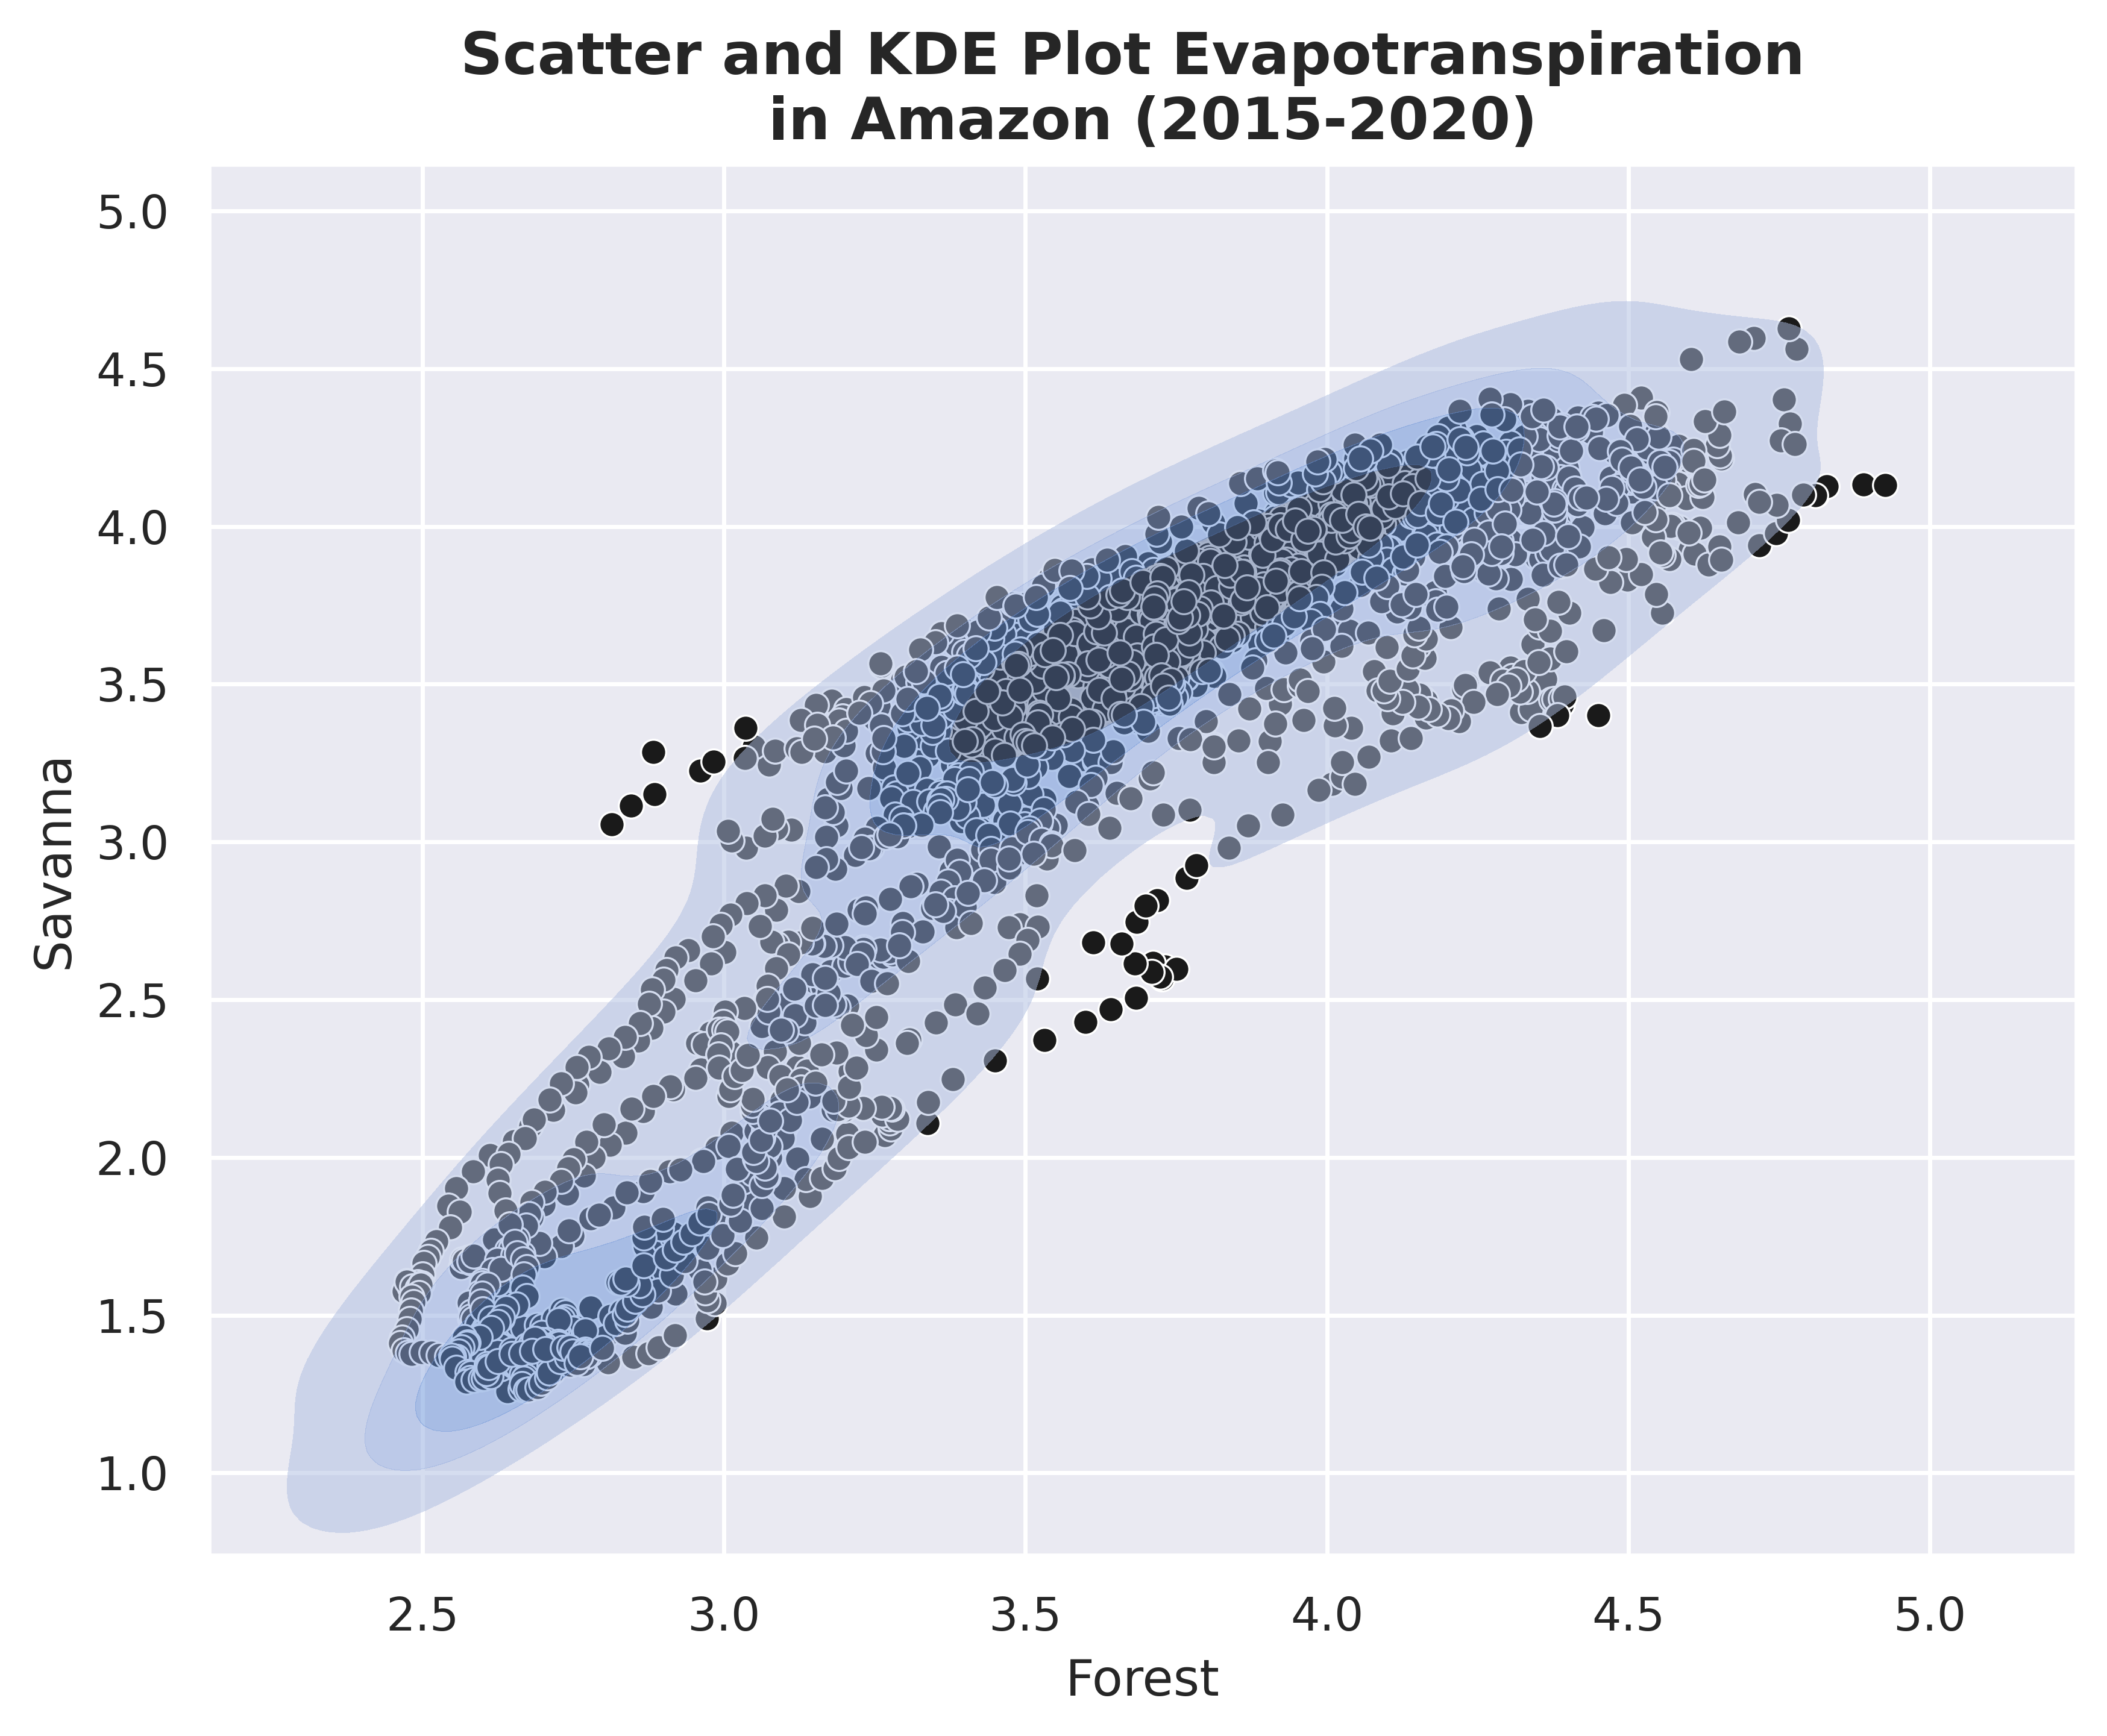

In [106]:
### scatter and kde plot
# set up size
plt.figure(figsize=(8, 6), dpi=500)

# scatter plot
sns.scatterplot(
    data=combined_dfs, x="Forest", y="Savanna", color="k")

# kde plot
sns.kdeplot(data=combined_dfs, x="Forest", y="Savanna", levels=5, fill=True, alpha=0.5, cut=2)

# add title, label and figure
plt.title("Scatter and KDE Plot Evapotranspiration \n in Amazon (2015-2020)", fontweight='bold', fontsize = 14)

# show the plot
plt.show()

### 7. Pearson Correlation
Estimate the Pearson Correlation


In [107]:
# calculate the Pearson's correlation coefficient
r_pearson = np.corrcoef(ds_for, ds_sav)[0, 1]

# print the the Pearson's correlation coefficient
print("Pearson Correlation:", round(r_pearson, 5))

Pearson Correlation: 0.9055


### 8. Spearman Rank Correlation
Estimae Spearman Rank Correlation

In [108]:
# calculate the Spearman Rank Correlation
r_spearman, _ = spearmanr(ds_for, ds_sav)

# print the the Spearman Rank Correlation
print("Spearman Correlation:", round(r_spearman, 5))

Spearman Correlation: 0.91036
